In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
afile = '../data/interim/epi/EPIv6.eff.dbnsfp.anno.dat.limit.xls'
df = pd.read_csv(afile, sep='\t')
cols = ['ccr', 'fathmm', 'vest', 'missense_badness', 'missense_depletion', 'is_domain']
X = df[cols]
y = df['y']
df.head()

,chrom,pos,ref,alt,clin_class,pfam,eff,gene,esp_af_max,ccr,fathmm,vest,missense_badness,missense_depletion,class,in_hgmd_dm,is_domain,y,in_uniprot_benign
0,1,40542572,T,C,PATHOGENIC,Palm_thioest:3,missense_variant,PPT1,0.000000,0.0000,-4.47,0.805,0.5888,1.0504,P,False,1,1,False
1,1,40557769,T,C,LIKELY_BENIGN,Palm_thioest:10,missense_variant,PPT1,0.000077,0.0000,-4.35,0.163,0.7114,1.0504,B,True,1,0,False
2,1,43393397,A,C,LIKLEY_PATHOGENIC,"MFS_1:44,Sugar_tr:29",missense_variant,SLC2A1,0.000000,95.6379,-1.08,0.866,0.7627,0.4825,P,False,1,1,False
3,1,43395283,T,C,PATHOGENIC,"MFS_1:47,Sugar_tr:32",missense_variant,SLC2A1,0.000000,96.3719,-1.46,0.883,0.4280,0.4825,P,False,1,1,False
4,1,43395386,G,A,LIKLEY_PATHOGENIC,"MFS_1:47,Sugar_tr:32",missense_variant,SLC2A1,0.000000,55.9748,-0.84,0.414,0.3941,0.4825,P,False,1,1,False


Feature ranking:
1. ccr (0.340406)
2. vest (0.317401)
3. fathmm (0.163914)
4. missense_depletion (0.098057)
5. missense_badness (0.048257)
6. is_domain (0.031965)


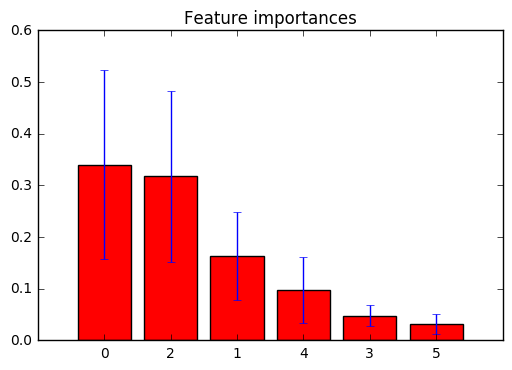

In [11]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()